Template untuk melihat visualisasi data jumlah sarana secara keseluruhan
- menampilkan komposisi sarana berdasarkan jenis
- menampilkan komposisi sarana berdasarkan kepemilikan
- menghasilkan rekap jumlah sarana berdasarkan kepemilikan dan jenis (dihitung dari status yang Aktiv/SG )
- rekap dapat di ekpor ke csv/excl file
- cara pemakian tinggal sesuaikan dataset pada line 1 ganti dengan dataset terbaru (dataset tanpa header)
- format dataset menggunakan data di bangwas.web.id (jika berbeda sesuaikan dengan jumlah kolom dan nama kolom)
- output dataset bisa digunakan untuk sinkronisasi data sebagai dataset awal


In [1]:
import pandas as pd
colnames=['id', 'kode_sarana', 'kode_sarana_lama', 'id_kartu', 'id_jenis', 'id_sub_jenis', 'seri', 'tahun_dinas', 'id_daops', 'id_depo', 'status', 'negara_asal', 'tgl_uji_pertama', 'tgl_masa_uji', 'tgl_masa_perawatan', 'pabrikan', 'id_pemilik', 'created_at', 'last_update' ] 
df_sarana = pd.read_csv('../data_source/datsar/tblsarana_update_juni2021.csv', sep=';', names=colnames)
df_sarana.head()


,id,kode_sarana,kode_sarana_lama,id_kartu,id_jenis,id_sub_jenis,seri,tahun_dinas,id_daops,id_depo,status,negara_asal,tgl_uji_pertama,tgl_masa_uji,tgl_masa_perawatan,pabrikan,id_pemilik,created_at,last_update
0,1,SR38401,MTT 2151,0,9,22,85,1984,16,43,Aktiv,NaN,0000-00-00,2020-02-14,0000-00-00,PLASSER AND THEURER,2,0000-00-00 00:00:00,0000-00-00 00:00:00
1,2,SU07501,HKPW,0,9,21,188,1975,18,49,Tidak Aktiv,NaN,0000-00-00,0000-00-00,0000-00-00,(kosong),2,0000-00-00 00:00:00,0000-00-00 00:00:00
2,3,SU39501,EM - 120,0,9,21,190,1995,8,20,Tidak Aktiv,NaN,0000-00-00,2021-08-19,0000-00-00,PLASSER AND THEURER,2,0000-00-00 00:00:00,0000-00-00 00:00:00
3,4,SC38301,HITACHI UDW 90,0,9,20,63,1983,26,66,Aktiv,NaN,0000-00-00,0000-00-00,0000-00-00,HITACHI,2,0000-00-00 00:00:00,0000-00-00 00:00:00
4,5,SC39301,GOTTWALD GS100.05,0,9,20,63,1993,26,48,Aktiv,NaN,0000-00-00,0000-00-00,0000-00-00,GOTTWALD,2,0000-00-00 00:00:00,0000-00-00 00:00:00


In [2]:
col_pemilik=['id', 'nama_pemilik', 'alamat'] 
df_pemilik = pd.read_csv('../data_source/datsar/tblpemiliksaranas.csv', names=col_pemilik, usecols=['id', 'nama_pemilik', 'alamat'])
df_pemilik.head()

,id,nama_pemilik,alamat
0,1,Ditjen Perkeretaapian,Jl. Medan Merdeka Barat No.8 Gambir Jakarta Pusat
1,2,PT Kereta Api Indonesia (Persero),Bandung
2,3,PT Kereta Commuter Indonesia,"Juanda, Jakarta"
3,4,PT Railink,Jakarta
4,5,PT MRT Jakarta,Lebakbulus


In [3]:
df_pemilik.drop(columns =['alamat'], inplace=True)
df_pemilik.head()

,id,nama_pemilik
0,1,Ditjen Perkeretaapian
1,2,PT Kereta Api Indonesia (Persero)
2,3,PT Kereta Commuter Indonesia
3,4,PT Railink
4,5,PT MRT Jakarta


In [4]:
col_daop =['id', 'nama_daop'] 
df_daop = pd.read_csv('../data_source/datsar/tbldaops.csv', names=col_daop, usecols=['id', 'nama_daop'])
df_daop.head()

,id,nama_daop
0,7,DAOP 1 JAKARTA
1,8,DAOP 2 BANDUNG
2,9,DAOP 3 CIREBON
3,10,DAOP 4 SEMARANG
4,11,DAOP 5 PURWOKERTO


In [5]:
join_df = df_sarana.set_index('id_pemilik').join(df_pemilik.set_index('id'), how='left')
join_df2 = join_df.set_index('id_daops').join(df_daop.set_index('id'), how='left')
print(join_df2.head())
print(join_df2.tail())

      id kode_sarana   kode_sarana_lama  id_kartu  id_jenis  id_sub_jenis  \
7  11736     SR31404       MTT CSM 6042         0         9            22   
7     11     SN01501    NR 19 / EX. GGW         0         9            19   
7     12     SN02101           GGR 2429         0         9            19   
7     50     SN06401  NR 8505 / SN01002         0         9            19   
7     53     SN31001           NW 87201         0         9            19   

   seri  tahun_dinas  id_depo       status negara_asal tgl_uji_pertama  \
7     0         2014       71        Aktiv         NaN      2015-04-14   
7   169         1915       57        Aktiv         NaN      0000-00-00   
7   147         1921       14        Aktiv         NaN      0000-00-00   
7   179         2010       15        Aktiv         NaN      0000-00-00   
7   185         2010       17  Tidak Aktiv         NaN      0000-00-00   

  tgl_masa_uji tgl_masa_perawatan             pabrikan           created_at  \
7   2016-04-1

In [30]:
join_df2[join_df2['nama_daop'].isna() ]

,id,kode_sarana,kode_sarana_lama,id_kartu,jenis_sarana,id_sub_jenis,seri,tahun_dinas,id_depo,status,negara_asal,tgl_uji_pertama,tgl_masa_uji,tgl_masa_perawatan,pabrikan,created_at,last_update,nama_pemilik,nama_daop
28,15840,K111897,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15841,K111898,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15842,K111899,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15843,K1118100,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15844,K1118101,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15845,K1118102,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15846,K1118103,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15847,K1118104,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-09-25,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15848,K1118105,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-12-16,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN
28,15849,K1118106,NaN,0,KRL,3,0,2018,76,Aktiv,KOREA,0000-00-00,2021-12-16,0000-00-00,HYUNDAY ROTEM,0000-00-00 00:00:00,0000-00-00 00:00:00,PT LRT Jakarta,NaN


In [32]:
join_df2['nama_daop'].fillna('Prov DKI Jakarta', inplace=True)

In [33]:
join_df2[join_df2['nama_daop'].isna() ]

,id,kode_sarana,kode_sarana_lama,id_kartu,jenis_sarana,id_sub_jenis,seri,tahun_dinas,id_depo,status,negara_asal,tgl_uji_pertama,tgl_masa_uji,tgl_masa_perawatan,pabrikan,created_at,last_update,nama_pemilik,nama_daop


In [8]:
def transform_data(jenis_sarana):
    if jenis_sarana == 1 :
        jenis_sarana = 'Lokomotif'
    elif jenis_sarana == 2 :
        jenis_sarana = 'KRL'
    elif jenis_sarana == 3 :
        jenis_sarana = 'KRD'
    elif jenis_sarana == 4 :
        jenis_sarana = 'Gerbong'
    elif jenis_sarana == 9 :
        jenis_sarana = 'Peralatan Khusus'
    elif jenis_sarana == 11 :
        jenis_sarana = 'Kereta'
    elif jenis_sarana == 19 :
        jenis_sarana = 'RailBus'
    else :
        jenis_sara = 'undefined'
        
    return jenis_sarana 

In [9]:
join_df2['id_jenis'] = join_df2['id_jenis'].apply(lambda x: transform_data(x))
join_df2 = join_df2.rename(columns={"id_jenis": "jenis_sarana"})
print(join_df2.head())
print(join_df2.tail())

      id kode_sarana   kode_sarana_lama  id_kartu      jenis_sarana  \
7  11736     SR31404       MTT CSM 6042         0  Peralatan Khusus   
7     11     SN01501    NR 19 / EX. GGW         0  Peralatan Khusus   
7     12     SN02101           GGR 2429         0  Peralatan Khusus   
7     50     SN06401  NR 8505 / SN01002         0  Peralatan Khusus   
7     53     SN31001           NW 87201         0  Peralatan Khusus   

   id_sub_jenis  seri  tahun_dinas  id_depo       status negara_asal  \
7            22     0         2014       71        Aktiv         NaN   
7            19   169         1915       57        Aktiv         NaN   
7            19   147         1921       14        Aktiv         NaN   
7            19   179         2010       15        Aktiv         NaN   
7            19   185         2010       17  Tidak Aktiv         NaN   

  tgl_uji_pertama tgl_masa_uji tgl_masa_perawatan             pabrikan  \
7      2015-04-14   2016-04-14         0000-00-00  PLASSER AND THE

In [10]:
data_sarana = join_df2.loc[(join_df2["status"] == "Aktiv")]
data_sarana.shape

(11676, 19)

In [11]:
jumlah_sarana = data_sarana.groupby(['jenis_sarana'])['kode_sarana'].count().reset_index()
print(jumlah_sarana)

       jenis_sarana  kode_sarana
0           Gerbong         7587
1               KRD           99
2               KRL         1584
3            Kereta         1698
4         Lokomotif          470
5  Peralatan Khusus          229
6           RailBus            9


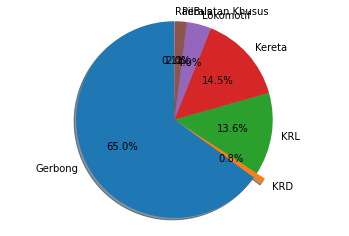

In [12]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = jumlah_sarana['jenis_sarana']
#sizes = [19, 27]
sizes = jumlah_sarana['kode_sarana']
explode = (0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

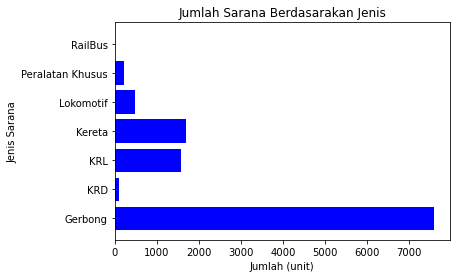

In [13]:
import matplotlib.pyplot as plt


labels = jumlah_sarana['jenis_sarana']
sizes = jumlah_sarana['kode_sarana']

plt.barh(labels, sizes, color='Blue')
plt.title('Jumlah Sarana Berdasarakan Jenis')
plt.ylabel('Jenis Sarana')
plt.xlabel('Jumlah (unit)')
plt.show

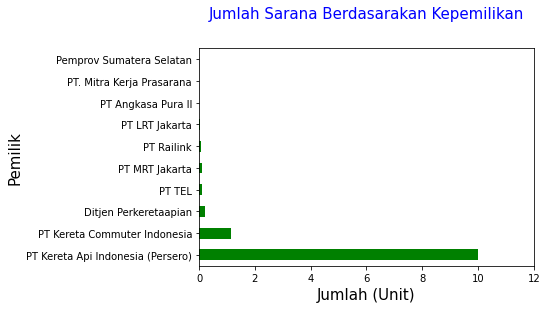

In [14]:
import matplotlib.pyplot as plt
plt.clf()
data_sarana.groupby('nama_pemilik')['jenis_sarana'].count().sort_values(ascending=False).plot(kind='barh', color='green')
plt.title('Jumlah Sarana Berdasarakan Kepemilikan', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Jumlah (Unit)', fontsize=15)
plt.ylabel('Pemilik', fontsize=15)
plt.xlim(xmin=0)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000).astype(int))
plt.yticks(rotation=0)
plt.show()

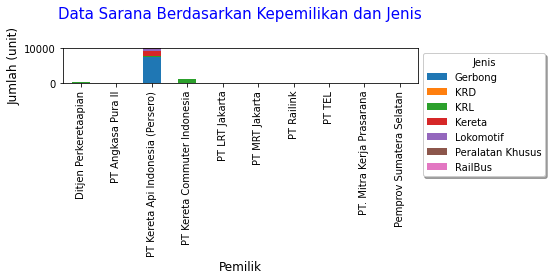

In [15]:
import matplotlib.pyplot as plt
data_sarana.groupby(['nama_pemilik', 'jenis_sarana'])['kode_sarana'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Data Sarana Berdasarkan Kepemilikan dan Jenis', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Pemilik', fontsize=12)
plt.ylabel('Jumlah (unit)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Jenis')
plt.ylim(ymin=0, ymax=10000)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

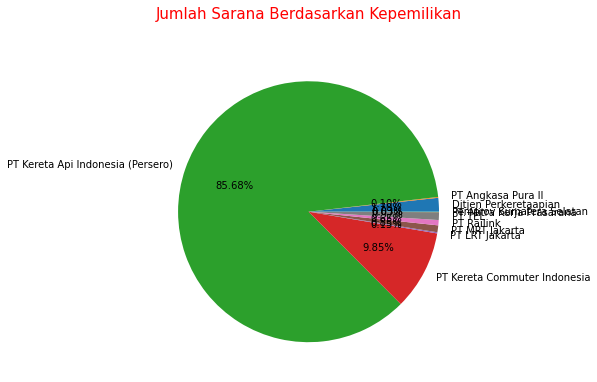

In [16]:
import matplotlib.pyplot as plt
jumlah_sarana2 = data_sarana.groupby(['nama_pemilik'])['kode_sarana'].count().reset_index()
plt.figure(figsize=(6,6))
plt.pie(jumlah_sarana2['kode_sarana'], labels = jumlah_sarana2['nama_pemilik'], autopct='%1.2f%%')
plt.title('Jumlah Sarana Berdasarkan Kepemilikan', loc='center', pad=30, fontsize=15, color='red')
plt.show()

In [17]:
data_sarana.columns

Index(['id', 'kode_sarana', 'kode_sarana_lama', 'id_kartu', 'jenis_sarana',
       'id_sub_jenis', 'seri', 'tahun_dinas', 'id_depo', 'status',
       'negara_asal', 'tgl_uji_pertama', 'tgl_masa_uji', 'tgl_masa_perawatan',
       'pabrikan', 'created_at', 'last_update', 'nama_pemilik', 'nama_daop'],
      dtype='object')

In [18]:
#join_df2.to_csv('data_source/datsar/tblsarana_after.csv', sep=',')

In [19]:
jumlah_KAI = data_sarana.groupby(['jenis_sarana'])['kode_sarana'].count().reset_index()
print(jumlah_sarana)

       jenis_sarana  kode_sarana
0           Gerbong         7587
1               KRD           99
2               KRL         1584
3            Kereta         1698
4         Lokomotif          470
5  Peralatan Khusus          229
6           RailBus            9


In [20]:
jumlah_sarana = data_sarana.groupby(['nama_pemilik','jenis_sarana'])['kode_sarana'].count().reset_index()
print(jumlah_sarana)

                         nama_pemilik      jenis_sarana  kode_sarana
0               Ditjen Perkeretaapian           Gerbong           99
1               Ditjen Perkeretaapian               KRL           40
2               Ditjen Perkeretaapian         Lokomotif            5
3               Ditjen Perkeretaapian  Peralatan Khusus           55
4                  PT Angkasa Pura II               KRL           12
5   PT Kereta Api Indonesia (Persero)           Gerbong         7375
6   PT Kereta Api Indonesia (Persero)               KRD           83
7   PT Kereta Api Indonesia (Persero)               KRL          210
8   PT Kereta Api Indonesia (Persero)            Kereta         1698
9   PT Kereta Api Indonesia (Persero)         Lokomotif          465
10  PT Kereta Api Indonesia (Persero)  Peralatan Khusus          167
11  PT Kereta Api Indonesia (Persero)           RailBus            6
12       PT Kereta Commuter Indonesia               KRL         1150
13                     PT LRT Jaka

In [21]:
rekap = jumlah_sarana.pivot_table(index=['nama_pemilik'], columns='jenis_sarana')
rekap

kode_sarana                                  \
jenis_sarana                          Gerbong   KRD     KRL  Kereta Lokomotif   
nama_pemilik                                                                    
Ditjen Perkeretaapian                    99.0   NaN    40.0     NaN       5.0   
PT Angkasa Pura II                        NaN   NaN    12.0     NaN       NaN   
PT Kereta Api Indonesia (Persero)      7375.0  83.0   210.0  1698.0     465.0   
PT Kereta Commuter Indonesia              NaN   NaN  1150.0     NaN       NaN   
PT LRT Jakarta                            NaN   NaN    16.0     NaN       NaN   
PT MRT Jakarta                            NaN   NaN    96.0     NaN       NaN   
PT Railink                                NaN  16.0    60.0     NaN       NaN   
PT TEL                                  113.0   NaN     NaN     NaN       NaN   
PT. Mitra Kerja Prasarana                 NaN   NaN     NaN     NaN       NaN   
Pemprov Sumatera Selatan                  NaN   NaN     NaN     NaN       NaN   

                                                            
jenis_sarana                      Peralatan Khusus RailBus  
nama_pemilik                                                
Ditjen Perkeretaapian                         55.0     NaN  
PT Angkasa Pura II                             NaN     NaN  
PT Kereta Api Indonesia (Persero)            167.0     6.0  
PT Kereta Commuter Indonesia                   NaN     NaN  
PT LRT Jakarta                                 1.0     NaN  
PT MRT Jakarta                                 3.0     NaN  
PT Railink                                     NaN     NaN  
PT TEL                                         NaN     NaN  
PT. Mitra Kerja Prasarana                      3.0     NaN  
Pemprov Sumatera Selatan                       NaN     3.0

In [22]:
rekap.fillna(0, inplace=True)
rekap

kode_sarana                                  \
jenis_sarana                          Gerbong   KRD     KRL  Kereta Lokomotif   
nama_pemilik                                                                    
Ditjen Perkeretaapian                    99.0   0.0    40.0     0.0       5.0   
PT Angkasa Pura II                        0.0   0.0    12.0     0.0       0.0   
PT Kereta Api Indonesia (Persero)      7375.0  83.0   210.0  1698.0     465.0   
PT Kereta Commuter Indonesia              0.0   0.0  1150.0     0.0       0.0   
PT LRT Jakarta                            0.0   0.0    16.0     0.0       0.0   
PT MRT Jakarta                            0.0   0.0    96.0     0.0       0.0   
PT Railink                                0.0  16.0    60.0     0.0       0.0   
PT TEL                                  113.0   0.0     0.0     0.0       0.0   
PT. Mitra Kerja Prasarana                 0.0   0.0     0.0     0.0       0.0   
Pemprov Sumatera Selatan                  0.0   0.0     0.0     0.0       0.0   

                                                            
jenis_sarana                      Peralatan Khusus RailBus  
nama_pemilik                                                
Ditjen Perkeretaapian                         55.0     0.0  
PT Angkasa Pura II                             0.0     0.0  
PT Kereta Api Indonesia (Persero)            167.0     6.0  
PT Kereta Commuter Indonesia                   0.0     0.0  
PT LRT Jakarta                                 1.0     0.0  
PT MRT Jakarta                                 3.0     0.0  
PT Railink                                     0.0     0.0  
PT TEL                                         0.0     0.0  
PT. Mitra Kerja Prasarana                      3.0     0.0  
Pemprov Sumatera Selatan                       0.0     3.0

In [23]:
rekap.columns = rekap.columns.droplevel(0)
rekap = rekap.astype('int64')
rekap

jenis_sarana,Gerbong,KRD,KRL,Kereta,Lokomotif,Peralatan Khusus,RailBus
nama_pemilik,,,,,,,
Ditjen Perkeretaapian,99,0,40,0,5,55,0
PT Angkasa Pura II,0,0,12,0,0,0,0
PT Kereta Api Indonesia (Persero),7375,83,210,1698,465,167,6
PT Kereta Commuter Indonesia,0,0,1150,0,0,0,0
PT LRT Jakarta,0,0,16,0,0,1,0
PT MRT Jakarta,0,0,96,0,0,3,0
PT Railink,0,16,60,0,0,0,0
PT TEL,113,0,0,0,0,0,0
PT. Mitra Kerja Prasarana,0,0,0,0,0,3,0


In [24]:
#rekap.to_csv('data_source/datsar/rekap_all.csv', sep=',')